In [1]:
from fastai.vision.all import *

In [2]:
Path.BASE_PATH=path=Path.home()/'datasets/paddy_classification'
trn_path=path/'train_images'
blb=trn_path/'bacterial_leaf_blight'

In [3]:
path.ls()

(#5) [Path('sample_submission.csv'),Path('test_images'),Path('train_images'),Path('paddy-disease-classification.zip'),Path('train.csv')]

In [4]:
df=pd.read_csv(path/'train.csv')

In [5]:
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [6]:
img=PILImage.create(blb/'100330.jpg')

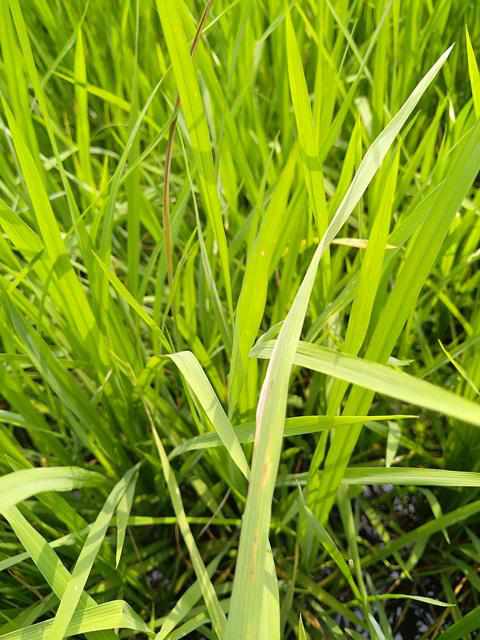

In [7]:
img

In [8]:
img.size

(480, 640)

In [9]:
files=get_image_files(trn_path)

In [10]:
files

(#10407) [Path('train_images/bacterial_leaf_streak/104135.jpg'),Path('train_images/bacterial_leaf_streak/100701.jpg'),Path('train_images/bacterial_leaf_streak/105386.jpg'),Path('train_images/bacterial_leaf_streak/106455.jpg'),Path('train_images/bacterial_leaf_streak/106974.jpg'),Path('train_images/bacterial_leaf_streak/104988.jpg'),Path('train_images/bacterial_leaf_streak/108304.jpg'),Path('train_images/bacterial_leaf_streak/109261.jpg'),Path('train_images/bacterial_leaf_streak/105378.jpg'),Path('train_images/bacterial_leaf_streak/103821.jpg')...]

In [11]:
[PILImage.create(o).size for o in files[:10]]

[(480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640)]

In [12]:
df.variety.value_counts()

ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: variety, dtype: int64

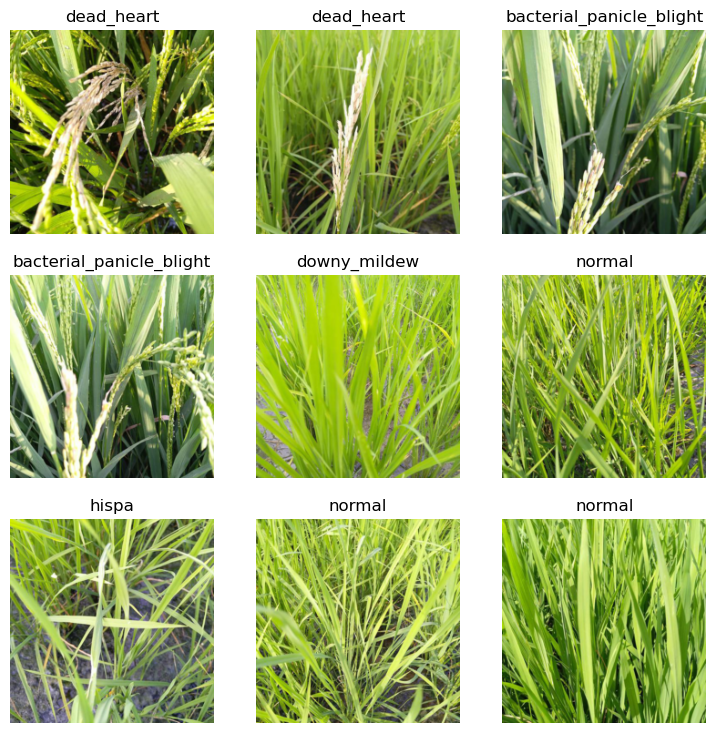

In [13]:
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, 
                                   seed=42,item_tfms=Resize(224))

dls.show_batch()

In [14]:
learn = vision_learner(dls,'convnext_small_in22k', 
                       metrics=error_rate).to_fp16()

SuggestedLRs(valley=0.0008317637839354575)

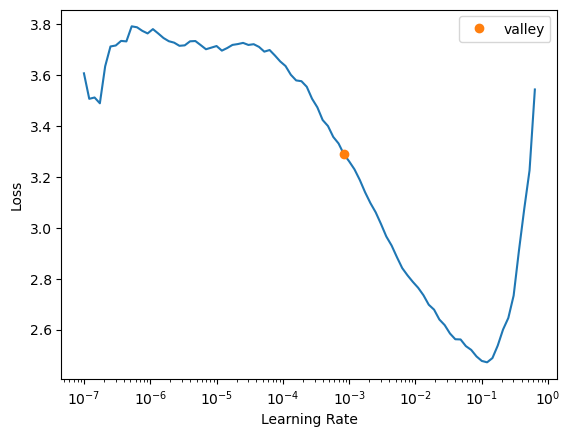

In [15]:
learn.lr_find()

In [16]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.171107,0.589944,0.185488,03:22


epoch,train_loss,valid_loss,error_rate,time
0,0.564319,0.290309,0.087458,08:49
1,0.372306,0.236683,0.074483,08:48


In [18]:
tst_files=get_image_files(path/'test_images')
tst_files.sort()

In [19]:
tst_dl=dls.test_dl(tst_files)

In [20]:
preds=learn.get_preds(dl=tst_dl,with_decoded=True)
probs,_,idxs=preds
idxs=pd.Series(idxs.numpy(),name='idxs')
mapping={k:v for k,v in enumerate(dls.vocab)}
results=idxs.map(mapping)

In [24]:
ss=pd.read_csv(path/'sample_submission.csv')
ss['label']=results

In [25]:
ss.to_csv('subm.csv',index=False)

In [29]:
!kaggle competitions submit -f ~/kaggle_notebooks/subm.csv -m 'init convnext 2 epochs' paddy-disease-classification

100%|██████████████████████████████████████| 69.9k/69.9k [00:05<00:00, 13.2kB/s]
Successfully submitted to Paddy Doctor: Paddy Disease Classification